In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = pd.read_csv("PCOS_DATASET.csv")

In [3]:
# Check first few rows
data.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0     193               193           0          30    69.979147   167.708055   
1     360               360           0          36    63.711688   154.055877   
2      10                10           0          36    51.848631   149.059804   
3     278               278           1          29    66.893988   148.628036   
4      71                71           0          33    52.536198   150.767409   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  23.185569           12                72                22  ...   
1  25.441392           13                70                18  ...   
2  23.928264           15                80                20  ...   
3  27.894935           15                72                18  ...   
4  23.079564           13                72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             1              0.0                  1           105.483401   
1             1              0.0                  1           115.883740   
2             0              0.0                  0           112.219711   
3             0              0.0                  1           104.619624   
4             0              0.0                  0            99.175454   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0             76.096379                 2                 4   
1             79.117243                 2                 3   
2             80.919417                 1                 1   
3             69.902681                 1                 1   
4             70.330461                 5                 2   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 10.0                  13.0          6.176029  
1                 13.0                  11.0          6.824718  
2                 14.0                  17.0          2.568691  
3                 12.0                  14.0          9.962732  
4                 11.5                   4.7          6.655190  

[5 rows x 44 columns]

In [4]:
print("Shape of dataset;", data.shape)

Shape of dataset; (2000, 44)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

In [6]:
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     3
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)       

In [7]:
# Remove unnecessary columns
id_cols = ["Sl. No", "Patient File No."]
data = data.drop(columns=[c for c in id_cols if c in data.columns], errors="ignore")


In [8]:
# Binary Y/N variables as categorical
binary_cols = ["PCOS (Y/N)", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)",
               "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)",
               "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Cycle(R/I)"]
for col in binary_cols:
    data[col] = data[col].astype("category")


In [9]:
# Convert hormone (string) columns to numeric
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')


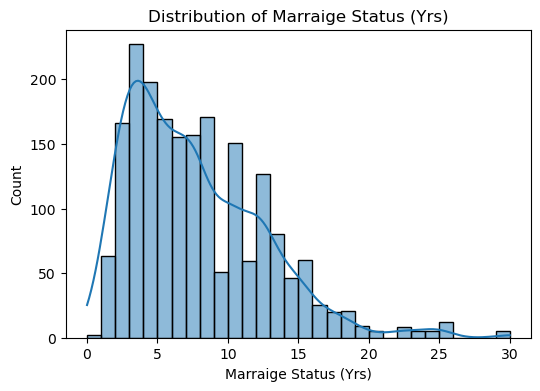

Skewness of Marraige Status (Yrs): 1.11


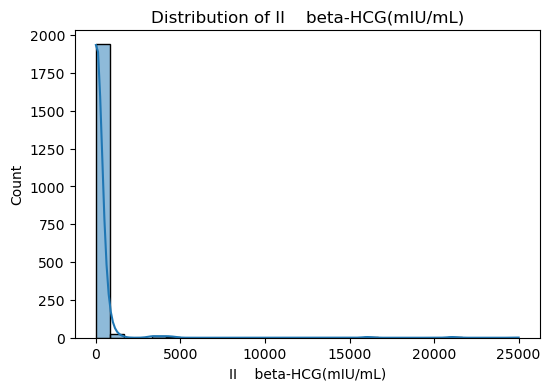

Skewness of II    beta-HCG(mIU/mL): 13.30


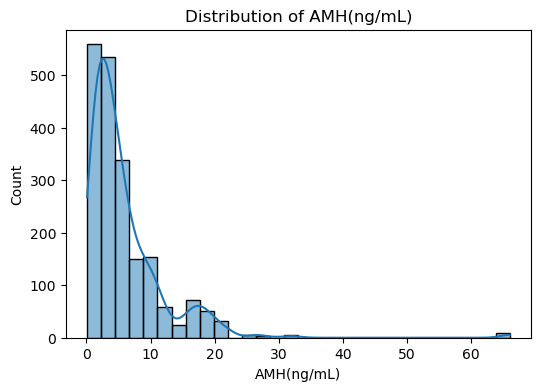

Skewness of AMH(ng/mL): 4.16


In [10]:
# Plot histograms to check the distribution and skewness of variables 
# before deciding whether to impute missing values with mean or median
import seaborn as sns

# Columns with missing values you were imputing
cols_to_check = ['Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

for col in cols_to_check:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    
    # Also check skewness
    skew_value = data[col].skew()
    print(f"Skewness of {col}: {skew_value:.2f}")


Since the distributions are skewed and contain outliers, median was chosen for imputation.

In [11]:
# Impute missing values in Marriage Status
if data['Marraige Status (Yrs)'].isnull().sum() > 0:
    data['Marraige Status (Yrs)'] = data['Marraige Status (Yrs)'].fillna(
        data['Marraige Status (Yrs)'].median()
    )


In [12]:
# Impute missing values in II    beta-HCG(mIU/mL) and AMH(ng/mL)
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median())
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median())



In [13]:
#check the final Data
print(data.info())
print(data.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PCOS (Y/N)              2000 non-null   category
 1    Age (yrs)              2000 non-null   int64   
 2   Weight (Kg)             2000 non-null   float64 
 3   Height(Cm)              2000 non-null   float64 
 4   BMI                     2000 non-null   float64 
 5   Blood Group             2000 non-null   int64   
 6   Pulse rate(bpm)         2000 non-null   int64   
 7   RR (breaths/min)        2000 non-null   int64   
 8   Hb(g/dl)                2000 non-null   float64 
 9   Cycle(R/I)              2000 non-null   category
 10  Cycle length(days)      2000 non-null   int64   
 11  Marraige Status (Yrs)   2000 non-null   float64 
 12  Pregnant(Y/N)           2000 non-null   category
 13  No. of abortions        2000 non-null   int64   
 14    I   beta-HCG(mIU/mL)  

In [14]:
print(data['Blood Group'].unique())
print(data['Blood Group'].value_counts())


[12 13 15 11 17 14 16 18]
Blood Group
15    754
13    500
11    400
17    156
16     70
14     65
12     51
18      4
Name: count, dtype: int64


In [15]:
# Check first few rows
data.head()

PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0          0          30    69.979147   167.708055  23.185569           12   
1          0          36    63.711688   154.055877  25.441392           13   
2          0          36    51.848631   149.059804  23.928264           15   
3          1          29    66.893988   148.628036  27.894935           15   
4          0          33    52.536198   150.767409  23.079564           13   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl) Cycle(R/I)  ...  Pimples(Y/N)  \
0                72                22      12.0          4  ...             1   
1                70                18      10.5          2  ...             1   
2                80                20      10.0          4  ...             0   
3                72                18      12.0          4  ...             0   
4                72                18      10.2          2  ...             0   

   Fast food (Y/N) Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              0.0                 1           105.483401   
1              0.0                 1           115.883740   
2              0.0                 0           112.219711   
3              0.0                 1           104.619624   
4              0.0                 0            99.175454   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0             76.096379                 2                 4   
1             79.117243                 2                 3   
2             80.919417                 1                 1   
3             69.902681                 1                 1   
4             70.330461                 5                 2   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  10.0                  13.0          6.176029  
1                  13.0                  11.0          6.824718  
2                  14.0                  17.0          2.568691  
3                  12.0                  14.0          9.962732  
4                  11.5                   4.7          6.655190  

[5 rows x 42 columns]

<Figure size 1500x1500 with 0 Axes>

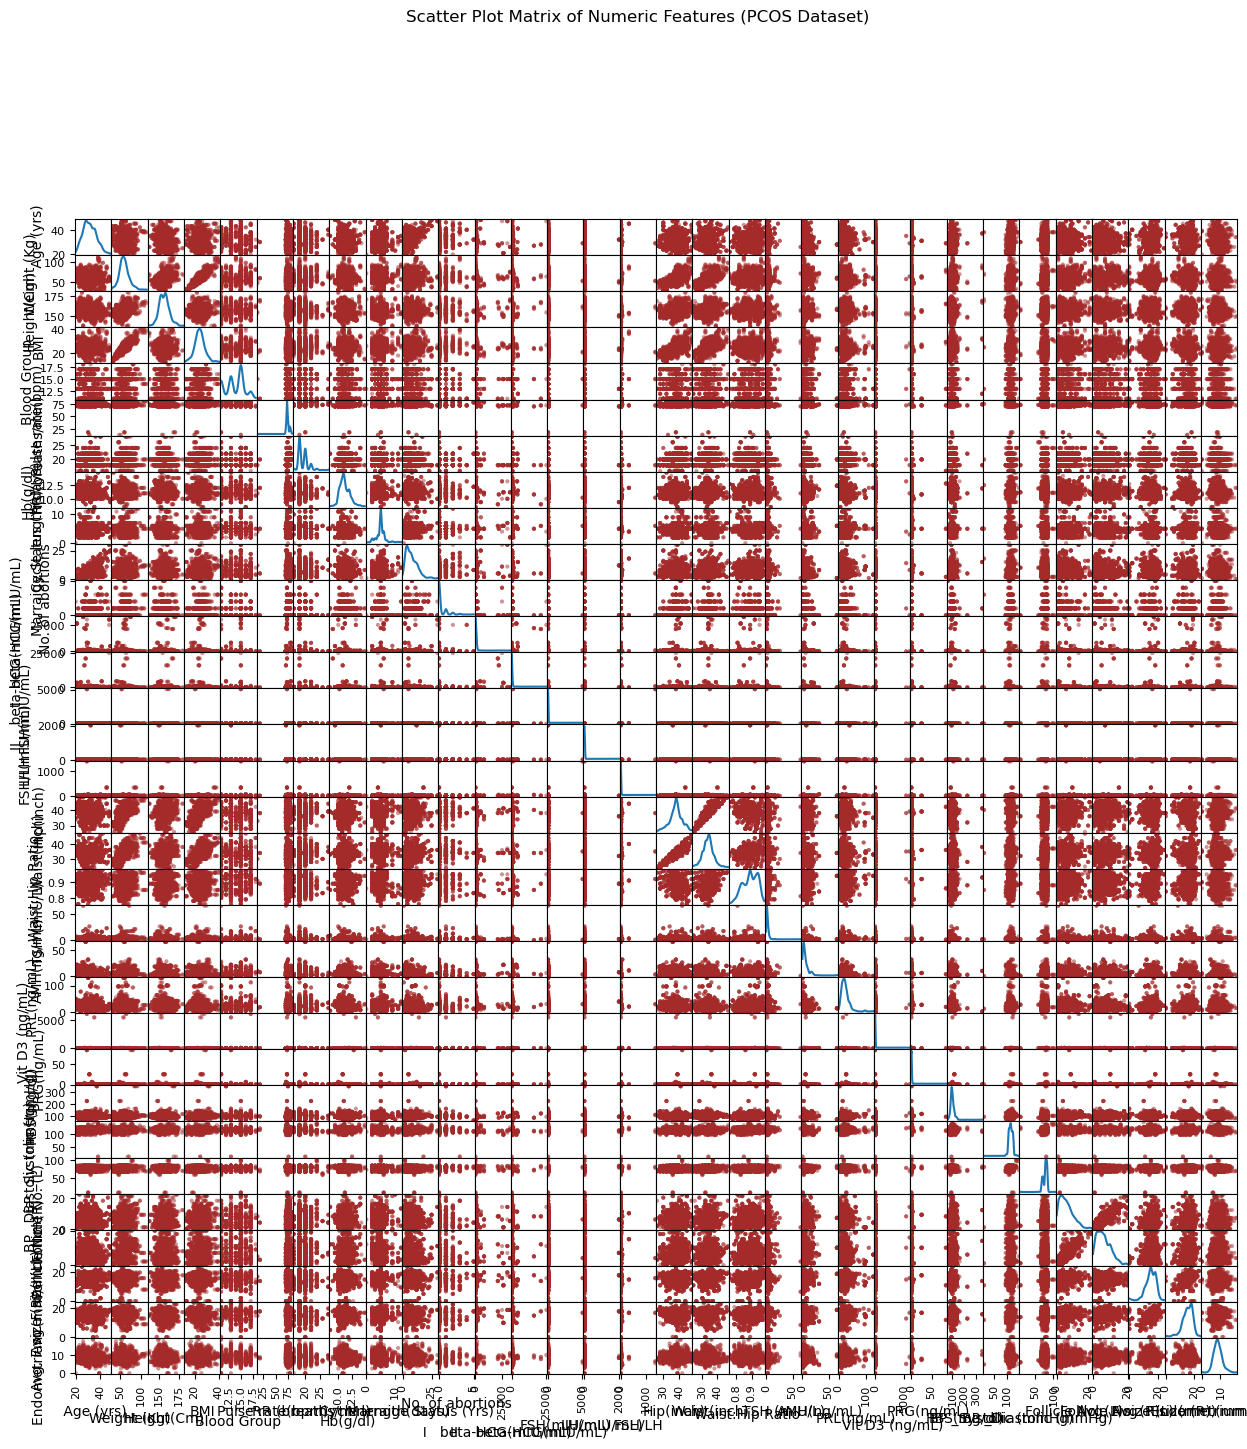

In [16]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# Select only numeric columns from your dataset
num_cols = data.select_dtypes(include=['number'])

# Create scatter matrix
plt.figure(figsize=(15, 15))
scatter_matrix(num_cols, figsize=(15, 15), diagonal='kde', alpha=0.5, color="brown")

# Add title
plt.suptitle("Scatter Plot Matrix of Numeric Features (PCOS Dataset)", y=1.02)
plt.show()

In [17]:
#Univariate selection 
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Separate features and target
X = data.drop(columns=["PCOS (Y/N)"])
y = data["PCOS (Y/N)"].astype(int)

# Apply SelectKBest
test = SelectKBest(score_func=chi2, k=10)   # pick top 5
fit = test.fit(X, y)
np.set_printoptions(precision=2)
print(fit.scores_)

# Transform dataset
featured_data = fit.transform(X)
print("\nFeatured data:\n", featured_data[0:5])

# Create DataFrame of features + scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': fit.scores_
}).sort_values(by='Score', ascending=False)

# Print top 5 features with scores
print("\nTop 10 features with Chi2 scores:\n")
print(feature_scores.head(10))



[6.31e+01 2.17e+02 2.52e+00 5.87e+01 3.77e-01 3.13e+00 1.11e+00 2.15e+00
 9.87e+01 2.54e+01 7.17e+01 2.19e-01 7.07e+00 4.40e+04 6.42e+03 3.92e+03
 2.40e+04 4.92e+00 2.67e+01 2.87e+01 5.37e-03 1.73e+00 1.23e+03 1.87e+00
 1.41e+04 1.23e+02 1.88e+01 2.31e+02 3.38e+02 3.09e+02 3.70e+01 8.11e+01
 1.43e+02 6.91e+00 7.21e-01 2.19e+00 2.11e+03 2.36e+03 2.67e+01 1.58e+01
 5.05e+00]

Featured data:
 [[455.8  121.8    5.7    2.37   5.76  28.7    1.     0.     2.     4.  ]
 [418.9  418.9    2.85   1.71   3.09  20.16   0.     0.     2.     3.  ]
 [  1.99   1.99   2.8    1.51   1.61  27.7    0.     0.     1.     1.  ]
 [  1.99   1.99   2.56   2.41   7.3   19.     1.     1.     1.     1.  ]
 [  4.42   1.99   4.85   0.72   1.01  42.36   0.     0.     5.     2.  ]]

Top 10 features with Chi2 scores:

                   Feature         Score
13    I   beta-HCG(mIU/mL)  44015.501708
16              LH(mIU/mL)  23969.716165
24          Vit D3 (ng/mL)  14050.909565
14  II    beta-HCG(mIU/mL)   6416.761456


In [18]:
#RFE Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Separate features and target
X = data.drop(columns=["PCOS (Y/N)"])
y = data["PCOS (Y/N)"].astype(int)

# Logistic Regression as base model
model = LogisticRegression(max_iter=1000)

# Select top 5 features (you can change n_features_to_select)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
print(fit.support_) 
print(fit.ranking_)


# Get feature rankings
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Selected': fit.support_,
    'Ranking': fit.ranking_
}).sort_values(by='Ranking')

# Print top 5 features
print("\nTop 5 features selected by RFE:\n")
print(ranking[ranking['Selected'] == True])


C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False  True False  True  True  True  True  True False  True False False
 False  True False False False]
[13 16 18 17 20  7 11 21  1  5  4  1 12 32 31 23  9 26 24 19  6 14  8 29
 30  1 28  1  1  1  1  1  2  1 22 15  3  1 25 10 27]

Top 5 features selected by RFE:

                 Feature  Selected  Ranking
11         Pregnant(Y/N)      True        1
8             Cycle(R/I)      True        1
25            PRG(ng/mL)      True        1
27      Weight gain(Y/N)      True        1
30        Hair loss(Y/N)      True        1
31          Pimples(Y/N)      True        1
29  Skin darkening (Y/N)      True        1
28      hair growth(Y/N)      True        1
37      Follicle No. (R)      True        1
33     Reg.Exercise(Y/N)      True        1


In [19]:
#PCA selection
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   # reduce dataset to 2 new features: PC1 and PC2
fit = pca.fit(X)

print(fit.explained_variance_ratio_)   
print(fit.components_)                 

# Create loadings DataFrame
loadings = pd.DataFrame(fit.components_.T,
                        columns=['PC1', 'PC2'],
                        index=X.columns)

print("Explained variance ratio:", fit.explained_variance_ratio_)



[0.89 0.1 ]
[[-5.43e-05  5.32e-05  8.43e-05  3.93e-07  1.74e-06 -2.86e-05 -4.01e-05
  -1.17e-05  2.64e-05  5.67e-06  7.46e-05  2.49e-05  2.63e-06  9.72e-01
   2.35e-01  1.96e-04 -2.78e-04  1.37e-04  3.83e-05  2.46e-06 -8.52e-07
  -5.73e-05  8.94e-05 -1.18e-04 -5.94e-04 -2.21e-06  8.89e-05 -1.10e-05
  -2.07e-06  8.35e-06  7.21e-06 -2.59e-06  4.14e-08  1.22e-05 -1.90e-04
  -1.11e-05  2.31e-05 -1.17e-05  3.22e-05  2.37e-05 -2.14e-05]
 [-2.84e-05 -2.11e-04  1.28e-04 -9.85e-05 -6.56e-05 -1.17e-05  2.32e-05
  -4.63e-05 -4.96e-05  5.77e-05 -5.62e-05  4.16e-05 -1.40e-05 -2.35e-01
   9.72e-01  3.51e-03 -7.36e-04  1.45e-03  3.12e-05  2.48e-05 -9.64e-08
  -7.40e-05 -1.12e-04 -7.48e-05  4.57e-04  3.61e-05  7.15e-05  7.17e-06
  -4.10e-06 -1.27e-05 -6.20e-06  7.72e-07 -9.78e-07 -3.34e-05 -1.34e-04
  -4.48e-05  7.06e-05  1.26e-04 -1.08e-04 -1.71e-05  6.12e-05]]
Explained variance ratio: [0.89 0.1 ]


In [20]:
#Feature Importance selection
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Separate features and target
X = data.drop(columns=["PCOS (Y/N)"])
y = data["PCOS (Y/N)"].astype(int)

# Train Extra Trees
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))   # top 10 features


                 Feature  Importance
28      hair growth(Y/N)    0.112122
37      Follicle No. (R)    0.108863
36      Follicle No. (L)    0.092502
29  Skin darkening (Y/N)    0.075432
27      Weight gain(Y/N)    0.070422
8             Cycle(R/I)    0.046673
32       Fast food (Y/N)    0.038170
31          Pimples(Y/N)    0.027768
22            AMH(ng/mL)    0.025488
16            LH(mIU/mL)    0.021251


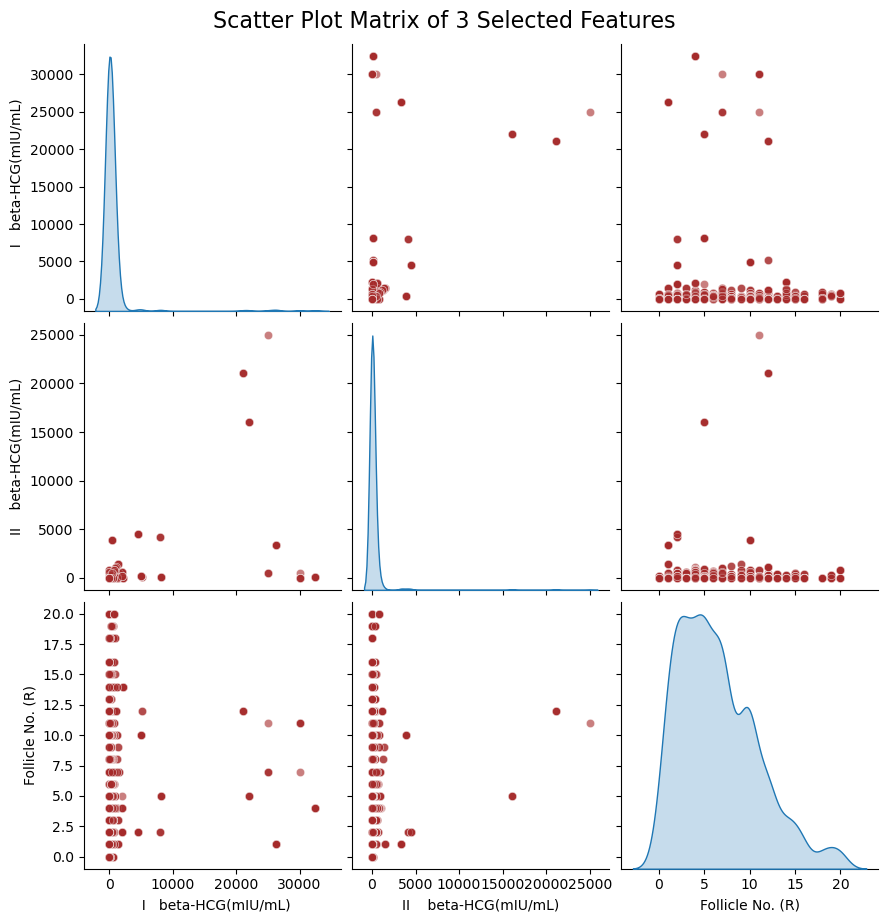

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the 3 features
selected_features = [
    "  I   beta-HCG(mIU/mL)",   # ensure exact column name
    "II    beta-HCG(mIU/mL)", # ensure exact column name
    "Follicle No. (R)"
]

df_selected = data[selected_features].copy()

# Scatter plot matrix (pairplot)
sns.pairplot(df_selected, diag_kind="kde", plot_kws={"alpha":0.6, "color":"brown"}, height=3)

plt.suptitle("Scatter Plot Matrix of 3 Selected Features", y=1.02, fontsize=16)
plt.show()


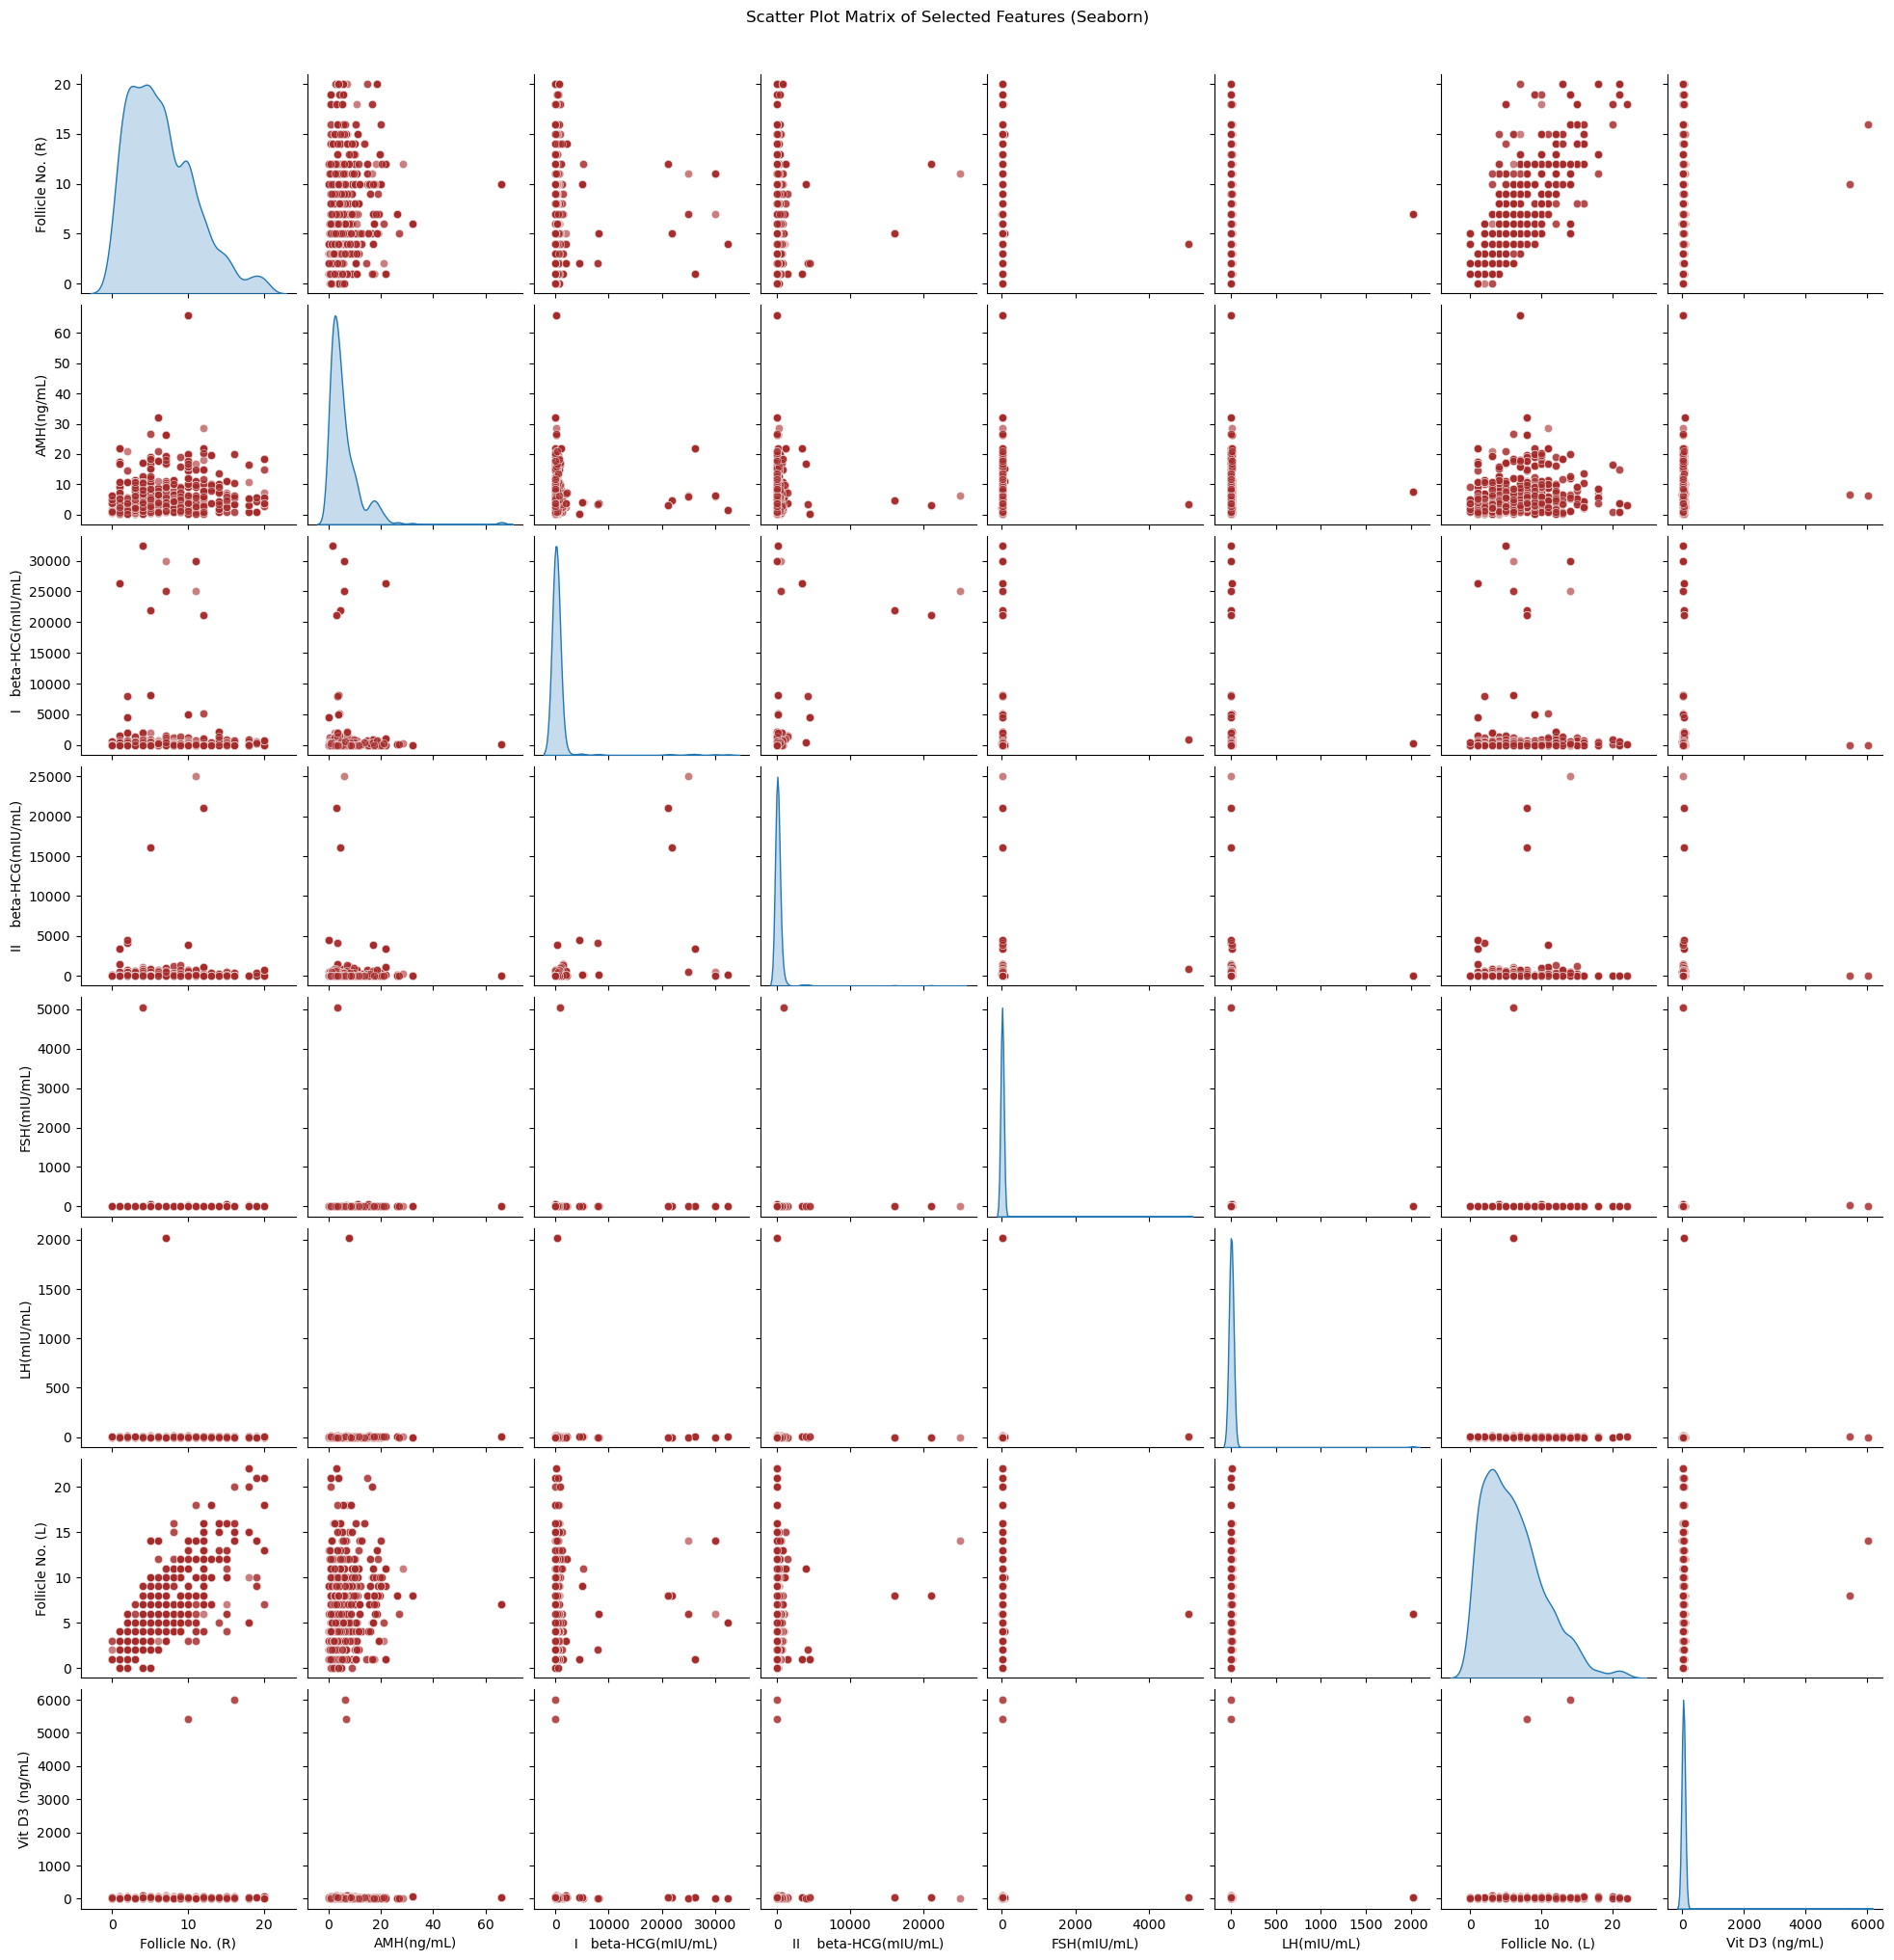

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the important features
selected_features = [
    "Follicle No. (R)",
    "AMH(ng/mL)",
    "  I   beta-HCG(mIU/mL)",   # must match exactly as in dataset
    "II    beta-HCG(mIU/mL)",  
    "FSH(mIU/mL)",
    "LH(mIU/mL)",
    "Follicle No. (L)",
    "Vit D3 (ng/mL)"
]

df_selected = data[selected_features]

# Create pairplot (scatter matrix) with seaborn
sns.pairplot(df_selected, diag_kind="kde", plot_kws={'alpha':0.6, 'color':'brown'})

plt.suptitle("Scatter Plot Matrix of Selected Features (Seaborn)", y=1.02)
plt.show()


C:\Users\drhud\AppData\Local\Temp\ipykernel_9528\2956228668.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


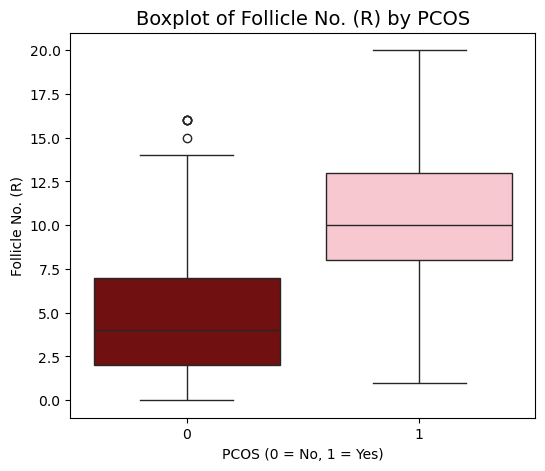

C:\Users\drhud\AppData\Local\Temp\ipykernel_9528\2956228668.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


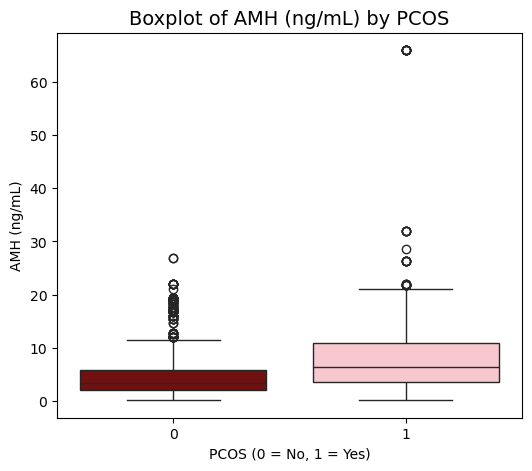

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure target is numeric
data["PCOS (Y/N)"] = data["PCOS (Y/N)"].astype(int)

# Feature 1: Follicle No. (R)
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="PCOS (Y/N)",
    y="Follicle No. (R)",
    data=data,
    palette=["maroon", "pink"]   # use list instead of dict
)
plt.title("Boxplot of Follicle No. (R) by PCOS", fontsize=14)
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Follicle No. (R)")
plt.show()

# Feature 2: AMH (ng/mL)
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="PCOS (Y/N)",
    y="AMH(ng/mL)",
    data=data,
    palette=["maroon", "pink"]   # same here
)
plt.title("Boxplot of AMH (ng/mL) by PCOS", fontsize=14)
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("AMH (ng/mL)")
plt.show()


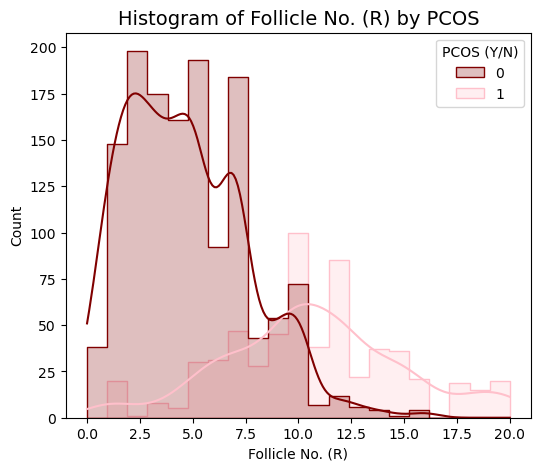

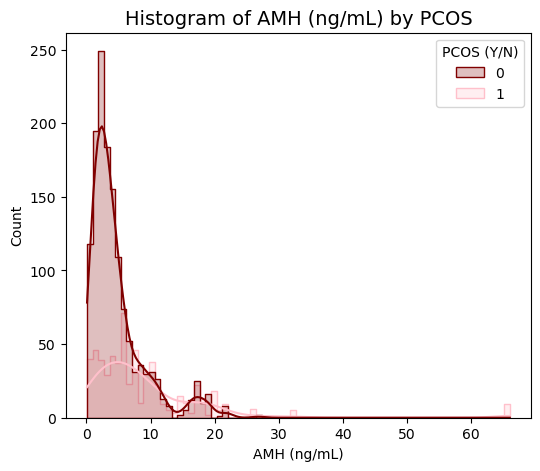

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure target is numeric
data["PCOS (Y/N)"] = data["PCOS (Y/N)"].astype(int)

# Feature 1: Follicle No. (R)
plt.figure(figsize=(6, 5))
sns.histplot(
    data=data,
    x="Follicle No. (R)",
    hue="PCOS (Y/N)",
    kde=True,
    element="step",
    palette=["maroon", "pink"]   # fixed palette
)
plt.title("Histogram of Follicle No. (R) by PCOS", fontsize=14)
plt.xlabel("Follicle No. (R)")
plt.ylabel("Count")
plt.show()

# Feature 2: AMH (ng/mL)
plt.figure(figsize=(6, 5))
sns.histplot(
    data=data,
    x="AMH(ng/mL)",
    hue="PCOS (Y/N)",
    kde=True,
    element="step",
    palette=["maroon", "pink"]   # fixed palette
)
plt.title("Histogram of AMH (ng/mL) by PCOS", fontsize=14)
plt.xlabel("AMH (ng/mL)")
plt.ylabel("Count")
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
#Picking three Columns #Defining The Data 
feat_cols = ["  I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "Follicle No. (R)"] 
data_cls = data.dropna(subset=feat_cols + ["PCOS (Y/N)"]).copy()

X = data_cls[feat_cols]
y = data_cls["PCOS (Y/N)"]


In [27]:
#Splitting the Data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [28]:
#Initialize and train logistic regression
log_reg = LogisticRegression(max_iter=3000,solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)



In [29]:
#computing confusion matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

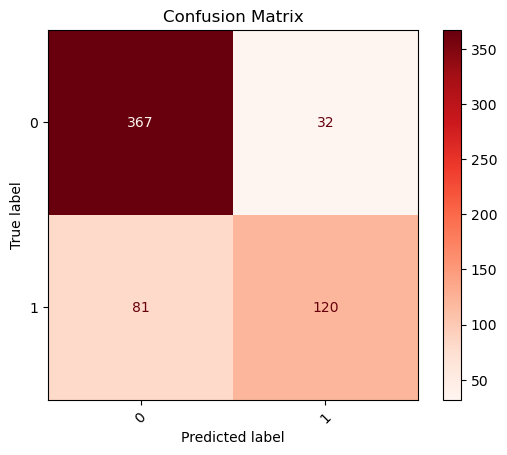

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
display_labels = ["No PCOS", "PCOS"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Reds', xticks_rotation=45)
plt.title("Confusion Matrix") 
plt.show()

In [31]:
#Accuracy
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.81


Coefficients: [-2.18e-06 -8.45e-06  6.67e-02]
Intercept: -0.12683361703282564
R^2: 0.4034161278908234


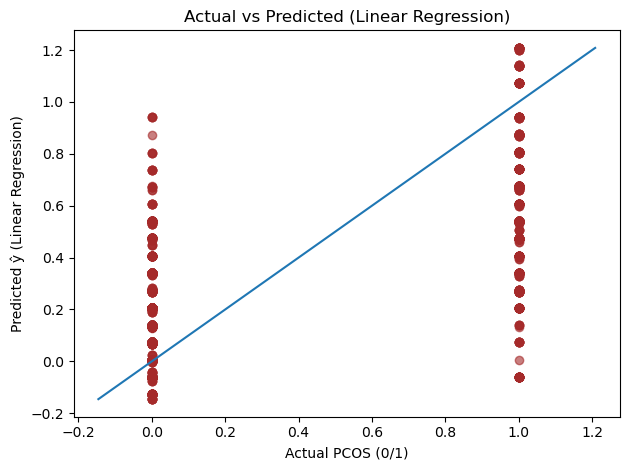

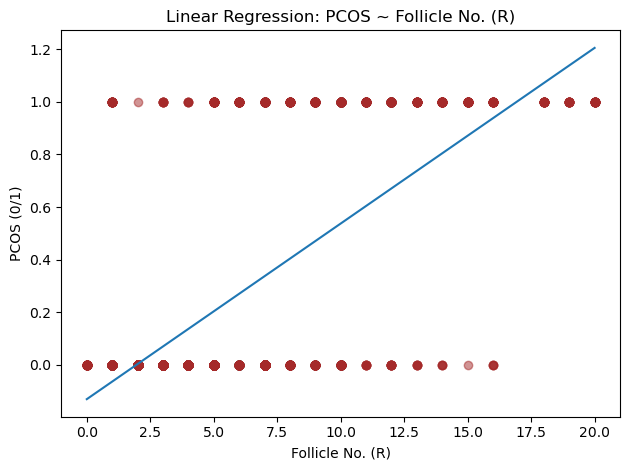

Single-feature line: ŷ = 0.0667 * FollicleNo(R) + -0.1299


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

feat_cols = ["  I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "Follicle No. (R)"]
target = "PCOS (Y/N)"
data = data.dropna(subset=feat_cols + [target]).copy()

X = data[feat_cols].values
y = data[target].values  # should be 0/1

LR = LinearRegression().fit(X, y)
coef = LR.coef_
intercept = LR.intercept_
r2 = LR.score(X, y)
print("Coefficients:", coef)
print("Intercept:", intercept)
print("R^2:", r2)

# 1) Actual vs Predicted plot (works for multi-feature regression)
y_hat = LR.predict(X)
plt.figure()
plt.scatter(y, y_hat, alpha=0.6,color="brown",)
lims = [min(y.min(), y_hat.min()), max(y.max(), y_hat.max())]
plt.plot(lims, lims)  # 45° line
plt.xlabel("Actual PCOS (0/1)")
plt.ylabel("Predicted ŷ (Linear Regression)")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()

# 2) Optional: 2-D line using strongest single feature (Follicle No. (R))
x1 = data["Follicle No. (R)"].values.reshape(-1,1)
LR1 = LinearRegression().fit(x1, y)
x1_grid = np.linspace(x1.min(), x1.max(), 200).reshape(-1,1)
y1_hat = LR1.predict(x1_grid)

plt.figure()
plt.scatter(x1, y, alpha=0.5,color="brown")
plt.plot(x1_grid, y1_hat)
plt.xlabel("Follicle No. (R)")
plt.ylabel("PCOS (0/1)")
plt.title("Linear Regression: PCOS ~ Follicle No. (R)")
plt.tight_layout()
plt.show()

print("Single-feature line: ŷ = "
      f"{LR1.coef_[0]:.4f} * FollicleNo(R) + {LR1.intercept_:.4f}")


In [33]:
#As our Target is Binary We Prefer Logestic Regression than Linear Regression 

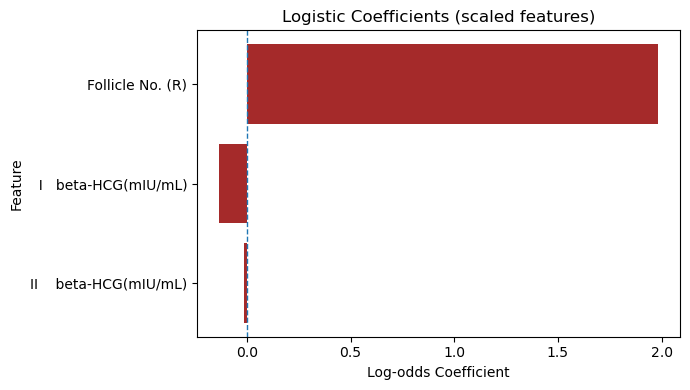

C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


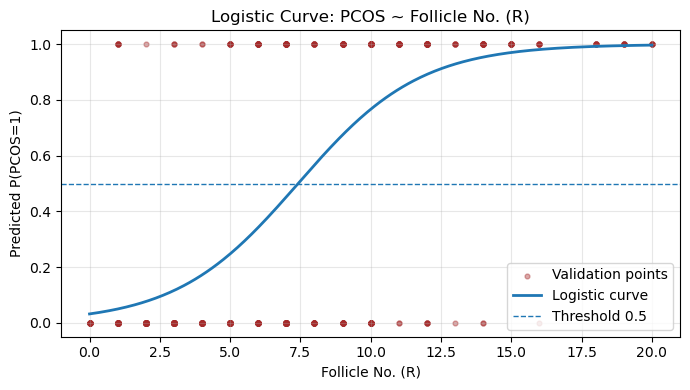

Single-feature line: ŷ = 0.0667 * FollicleNo(R) + -0.1299
Coefficients: [-2.18e-06 -8.45e-06  6.67e-02]
Intercept: -0.12683361703282564


In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SkLogisticRegression
#selected Columns 
feat_cols = ["I   beta-HCG(mIU/mL)", "II    beta-HCG(mIU/mL)", "Follicle No. (R)"]
# If X_train/X_test are ndarrays, wrap them with column names
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=feat_cols)
    X_test_df  = pd.DataFrame(X_test,  columns=feat_cols)
    features = np.array(feat_cols)
else:
    X_train_df = X_train.copy()
    X_test_df  = X_test.copy()
    features = X_train_df.columns.to_numpy()

# --- Fit a logistic pipeline if you don't already have one ---
from sklearn.linear_model import LogisticRegression
log_model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs")
)
log_model.fit(X_train_df, y_train)

# --- Coefficient bar plot (brown) ---
logit = log_model.named_steps["logisticregression"]
coefs = logit.coef_.ravel()

order = np.argsort(np.abs(coefs))
plt.figure(figsize=(7, 4))
plt.barh(features[order], coefs[order], color="brown")
plt.axvline(0, linestyle="--", linewidth=1)
plt.xlabel("Log-odds Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Coefficients (scaled features)")
plt.tight_layout()
plt.show()

# --- Single-feature logistic curve ---
single_feat = "Follicle No. (R)" if "Follicle No. (R)" in features else features[0]

log_single = SkLogisticRegression(solver="lbfgs", max_iter=3000, class_weight="balanced")
log_single.fit(X_train_df[[single_feat]], y_train)

x_grid = np.linspace(X_train_df[single_feat].min(), X_train_df[single_feat].max(), 400).reshape(-1, 1)
p_grid = log_single.predict_proba(x_grid)[:, 1]

plt.figure(figsize=(7, 4))
plt.scatter(X_test_df[single_feat], y_test, s=12, alpha=0.4, label="Validation points", color="brown")
plt.plot(x_grid.ravel(), p_grid, linewidth=2, label="Logistic curve")
plt.axhline(0.5, linestyle="--", linewidth=1, label="Threshold 0.5")
plt.xlabel(single_feat)
plt.ylabel("Predicted P(PCOS=1)")
plt.title(f"Logistic Curve: PCOS ~ {single_feat}")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("Single-feature line: ŷ = "
      f"{LR1.coef_[0]:.4f} * FollicleNo(R) + {LR1.intercept_:.4f}")
print("Coefficients:", coef)
print("Intercept:", intercept)

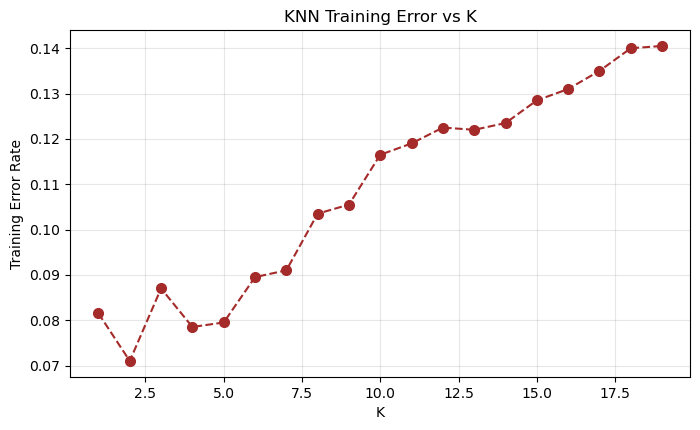

In [35]:
# --- Block 1: KNN training error vs K ---

# 0) Clean column names once
data.columns = data.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# 1) Define columns
feat_cols = ["I beta-HCG(mIU/mL)", "Follicle No. (R)"]
target_col = "PCOS (Y/N)"

# 2) Subset & drop missing
df = data.dropna(subset=feat_cols + [target_col]).copy()

# 3) X as DataFrame, y as 1-D Series ('Y'/'N' OK)
X = df[feat_cols]
y = df[target_col].astype(str).str.strip().str.upper()

# 4) Scale features for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Plot training error vs K
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

errs = []
ks = range(1, 20)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    pred = knn.predict(X_scaled)
    errs.append((pred != y).mean())

plt.figure(figsize=(8, 4.5))
plt.plot(list(ks), errs, linestyle='dashed', marker='o', markersize=7,color = "brown")
plt.xlabel('K')
plt.ylabel('Training Error Rate')
plt.title('KNN Training Error vs K')
plt.grid(True, alpha=0.3)
plt.show()


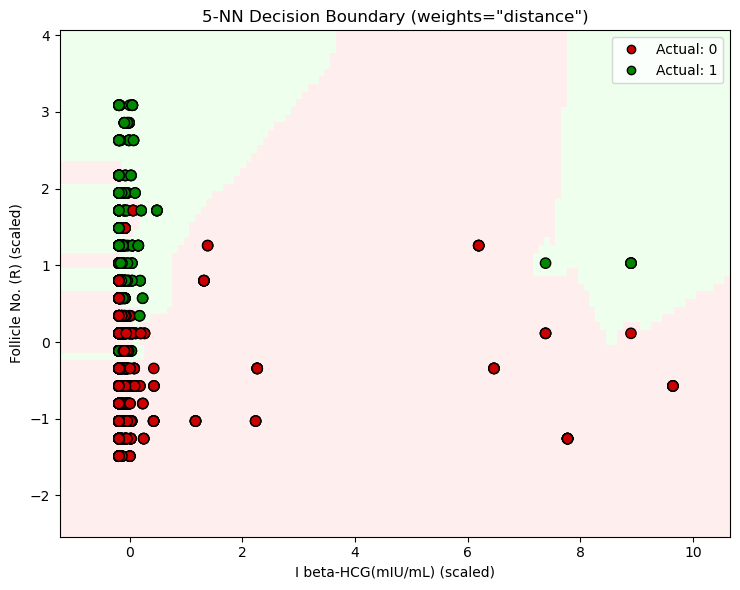

In [36]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from sklearn.neighbors import KNeighborsClassifier

# Ensure we are using the same scaled features and labels from Block 1
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
clf.fit(X_scaled, y)

# Mesh grid in *scaled* feature space
h = 0.1
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict labels on grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels to integers for coloring (stable, sorted order)
unique_labels = np.sort(np.unique(y))
label_to_int = {lab: i for i, lab in enumerate(unique_labels)}
Z_int = np.vectorize(label_to_int.get)(Z).reshape(xx.shape)
y_int = np.vectorize(label_to_int.get)(y)

# Define colormaps (background and points)
cmap_bg = ListedColormap(['#FFEEEE', '#EEFFEE'])  # light reds/greens
cmap_pts = ListedColormap(['#CC0000', '#008800'])

plt.figure(figsize=(7.5, 6))
plt.pcolormesh(xx, yy, Z_int, cmap=cmap_bg, shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_int, cmap=cmap_pts, edgecolor='k', s=55)
plt.title(f'{n_neighbors}-NN Decision Boundary (weights="distance")')
plt.xlabel(feat_cols[0] + ' (scaled)')
plt.ylabel(feat_cols[1] + ' (scaled)')

# Legend with true label names
legend_handles = [
    Line2D([0], [0], marker='o', linestyle='None', markerfacecolor=cmap_pts(i),
           markeredgecolor='k', label=f'Actual: {lab}')
    for lab, i in label_to_int.items()
]
plt.legend(handles=legend_handles, loc='best')
plt.tight_layout()
plt.show()


In [37]:
#Accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_accuracy = clf.score(X_train, y_train) 
test_accuracy = clf.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

0.559375
0.585


C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Naïve Bayes Training Accuracy: 0.83875
Naïve Bayes Testing Accuracy: 0.8325
Confusion Matrix:
 [[250  28]
 [ 39  83]]


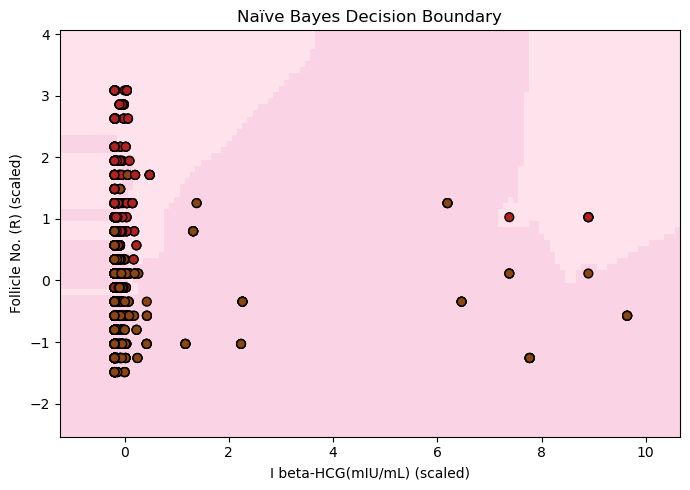

In [38]:
# --- Naïve Bayes on PCOS dataset ---

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Split the same scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test)
train_acc_nb = nb.score(X_train, y_train)
test_acc_nb = nb.score(X_test, y_test)

print("Naïve Bayes Training Accuracy:", train_acc_nb)
print("Naïve Bayes Testing Accuracy:", test_acc_nb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# --- Decision Boundary Visualization ---
h = 0.1
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Decision boundary visualization 

h = 0.1
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Series(Z).map({'Y':1, 'N':0, '1':1, '0':0}).astype(int).to_numpy()
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FAD4E5', '#FFE3EC']), shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            c=pd.Series(y).map({'Y':1, 'N':0, '1':1, '0':0}),
            cmap=ListedColormap(['#8B4513', '#B22222']),
            edgecolor='k', s=40)
plt.title("Naïve Bayes Decision Boundary")
plt.xlabel(feat_cols[0] + " (scaled)")
plt.ylabel(feat_cols[1] + " (scaled)")
plt.tight_layout()
plt.show()


The Naïve Bayes classifier achieved a training accuracy of 83.9% and a testing accuracy of 83.3%, indicating consistent generalization and no evidence of overfitting. The confusion matrix shows that the model correctly identified most non-PCOS and PCOS cases, although a few PCOS instances were misclassified as non-PCOS. The decision boundary plot illustrates smooth, probabilistic class separation typical of Naïve Bayes, with overlapping regions suggesting limited discriminative power between the two classes. This overlap indicates that I beta-HCG (mIU/mL) and Follicle No. (R) alone are not strong enough predictors to fully distinguish PCOS from non-PCOS cases. Overall, the model performs reasonably well as a baseline classifier,

In [39]:
train_accuracy = clf.score(X_train, y_train) 
test_accuracy = clf.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

0.93
0.9425


Between the two models, Naïve Bayes performs significantly better on this dataset. Its accuracy (≈83%) is much higher than that of KNN (≈58%), and it shows better generalization, with training and testing scores being close. The smoother probabilistic nature of Naïve Bayes allows it to handle overlapping data distributions more effectively, while KNN struggles due to the sparsity and possible noise in the selected features. Therefore, Naïve Bayes is the more suitable model for this PCOS dataset, especially given its stability and interpretability.

In [40]:
# === SVM on PCOS (Follicle No. (R), AMH(ng/mL)) ===

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# 1) Select features + target
feat_cols = ["Follicle No. (R)", "AMH(ng/mL)"]
x = data[feat_cols].dropna().copy()
y = data.loc[x.index, "PCOS (Y/N)"].copy()  # already 0/1

# 2) Scale features
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
x = pd.DataFrame(X_scaled, columns=feat_cols)

# 3) Define–fit–predict
svc = SVC(kernel='linear', C=1)
svc.fit(x, y)
svc_pred = svc.predict(x)
print('svc (linear) accuracy', accuracy_score(y, svc_pred)*100)

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svc.fit(x, y)
rbf_pred = rbf_svc.predict(x)
print('rbf_svc accuracy', accuracy_score(y, rbf_pred)*100)

poly_svc = SVC(kernel='poly', degree=3, C=1)
poly_svc.fit(x, y)
poly_pred = poly_svc.predict(x)
print('poly_svc accuracy', accuracy_score(y, poly_pred)*100)

sigmoid_svc = SVC(kernel='sigmoid', C=1)
sigmoid_svc.fit(x, y)
sigmoid_pred = sigmoid_svc.predict(x)
print('sigmoid_svc accuracy', accuracy_score(y, sigmoid_pred)*100)



svc (linear) accuracy 83.15
rbf_svc accuracy 85.39999999999999
poly_svc accuracy 82.15
sigmoid_svc accuracy 74.05000000000001


Among the four SVM models, the RBF kernel achieved the highest accuracy of 85.4%, making it the best-performing model for classifying PCOS and non-PCOS cases. The linear and polynomial kernels performed similarly with 83.1% and 82.1%, suggesting that the data has partial linear patterns but also benefits from nonlinear flexibility. The sigmoid kernel showed the lowest accuracy (74.1%), indicating poor fit for this dataset. Overall, the RBF kernel captures the complex relationship between Follicle No. (R) and AMH(ng/mL) most effectively.

C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\drhud\Downloads\pain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


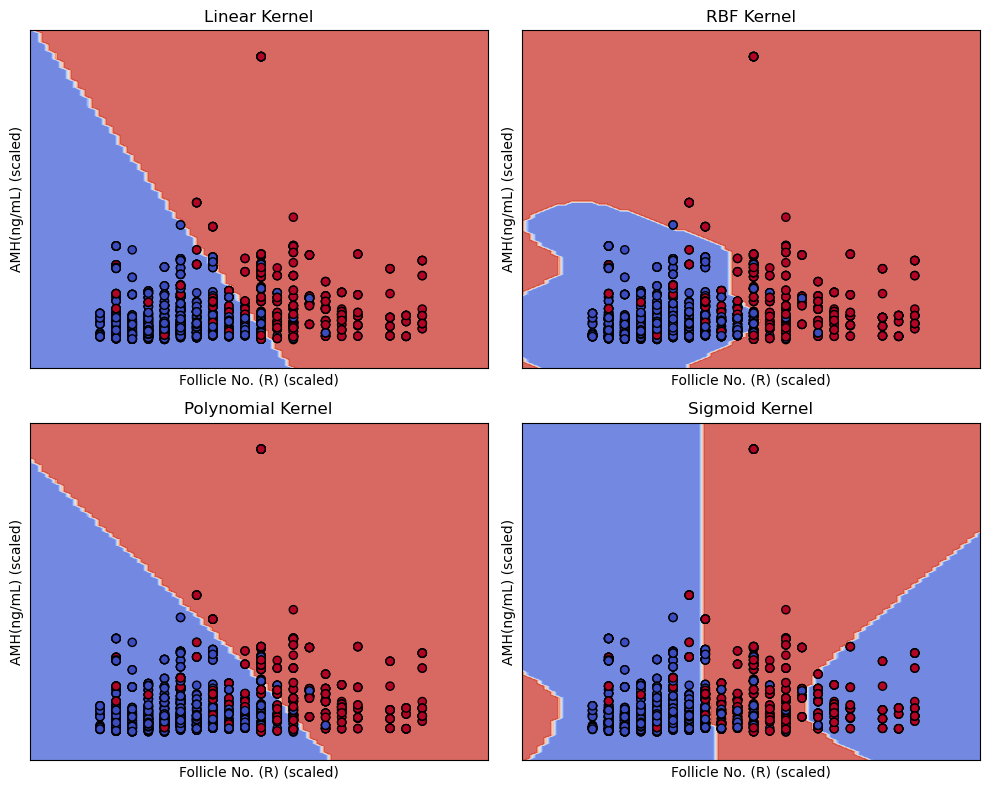

In [41]:
# --- 4) Plot all 4 Decision Boundaries ---
h = 0.1
x_min, x_max = x.iloc[:,0].min()-1, x.iloc[:,0].max()+1
y_min, y_max = x.iloc[:,1].min()-1, x.iloc[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['Linear Kernel', 'RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']
models = (svc, rbf_svc, poly_svc, sigmoid_svc)

plt.figure(figsize=(10, 8))
for i, clf in enumerate(models, start=1):
    plt.subplot(2, 2, i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=35)
    plt.xlabel(feat_cols[0] + ' (scaled)')
    plt.ylabel(feat_cols[1] + ' (scaled)')
    plt.title(titles[i-1])
    plt.xticks(()); plt.yticks(())

plt.tight_layout()
plt.show()


The visualization compares how different SVM kernels (Linear, RBF, Polynomial, and Sigmoid) classify PCOS and non-PCOS cases using Follicle No. (R) and AMH(ng/mL) as predictors.
In the Linear Kernel, the boundary is a straight line, suggesting that the data shows some linear separability. The Polynomial Kernel performs similarly but introduces slight curvature, providing more flexibility in separating the classes. The RBF Kernel creates a nonlinear, smoother boundary that adapts well to data clusters, showing better separation and fewer overlaps between the two groups, aligning with its highest accuracy (85.4%). The Sigmoid Kernel shows irregular and fragmented regions, indicating unstable decision boundaries and poorer performance.
Overall, the RBF Kernel provides the most reliable and accurate separation, effectively capturing the complex relationship between the two features.

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features
feat_cols = ["I beta-HCG(mIU/mL)", "Follicle No. (R)"]
target_col = "PCOS (Y/N)"

X = data[feat_cols].values
y = data[target_col].values

#2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

#4. Create – Fit – Predict – Accuracy
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
AS = accuracy_score(y_test, y_pred)
print(AS)
CR = classification_report(y_test, y_pred)
print(CR)




[[276   2]
 [ 24  98]]
0.935
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       278
           1       0.98      0.80      0.88       122

    accuracy                           0.94       400
   macro avg       0.95      0.90      0.92       400
weighted avg       0.94      0.94      0.93       400



1. 276 Non-PCOS patients were correctly predicted as Non-PCOS.
2. 2 Non-PCOS patients were incorrectly predicted as PCOS (false positives).
3. 98 PCOS patients were correctly predicted as PCOS.
4. 24 PCOS patients were incorrectly predicted as Non-PCOS (false negatives).

The model is very accurate for Non-PCOS and also strongly identifies PCOS, though it misses a small number.

Class 0 – Non-PCOS
Precision = 0.92→ When the model predicts Non-PCOS, it is correct 92% of the time.
Recall = 0.99→ The model successfully identifies 99% of all actual Non-PCOS patients (almost none missed).
F1-score = 0.96→ Strong balance of precision and recall.
Class 1 – PCOS
Precision = 0.98→ When the model predicts PCOS, it is correct 98% of the time (very few false positives).
Recall = 0.80→ The model correctly identifies 80% of real PCOS cases (it misses some — 24 cases).
F1-score = 0.88→ Good but slightly lower because of missed PCOS cases.

In [43]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.tree import export_graphviz
import graphviz
rf= RandomForestClassifier(n_estimators=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1)

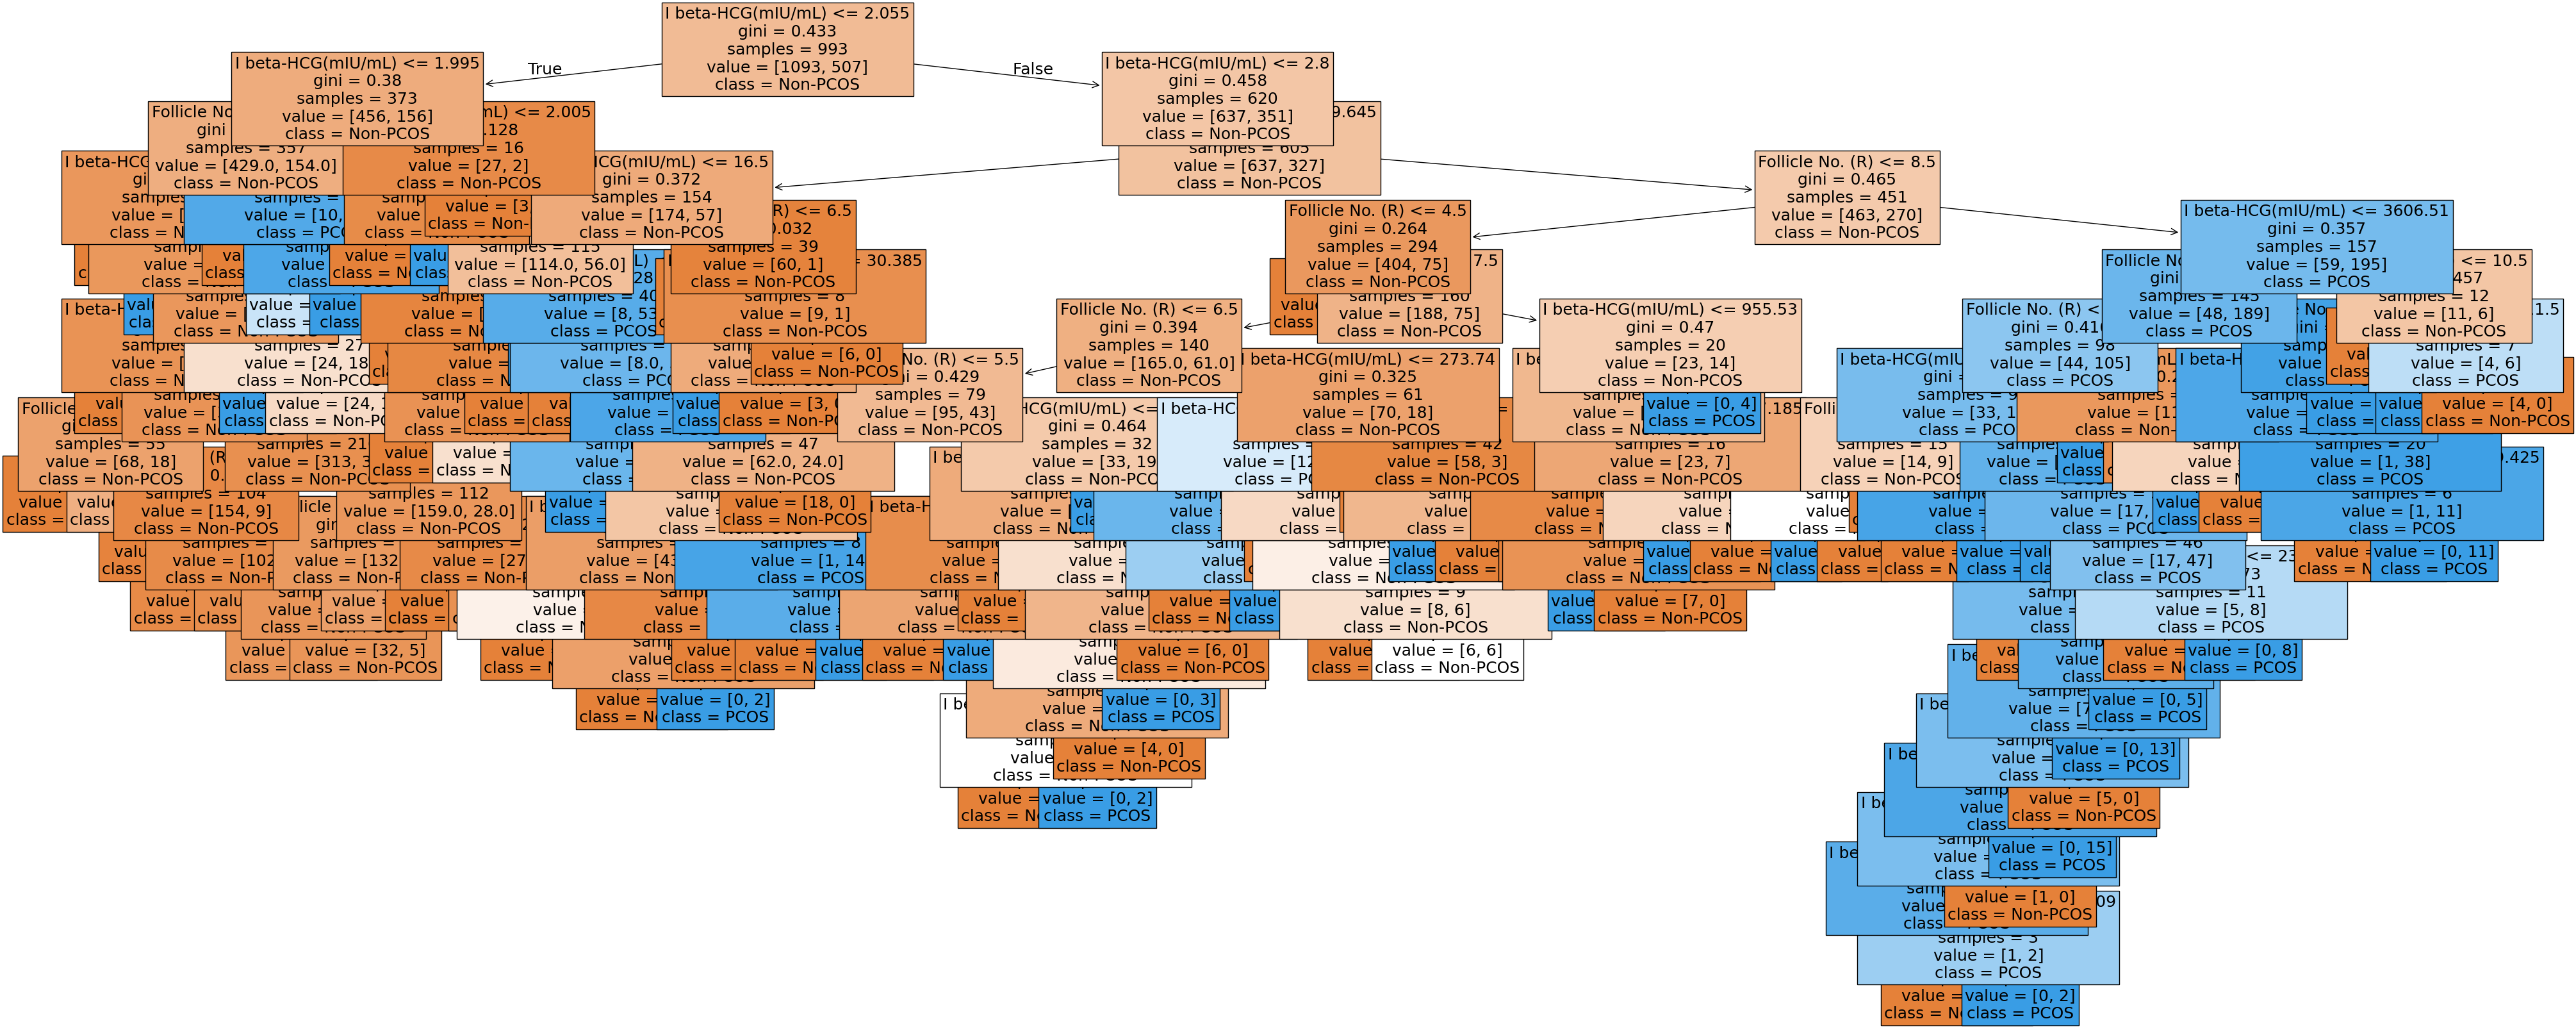

In [45]:
from sklearn import tree

plt.figure(figsize=(50, 20))   
_ = tree.plot_tree(
        rf.estimators_[0],
        feature_names=["I beta-HCG(mIU/mL)", "Follicle No. (R)"],
        class_names=["Non-PCOS", "PCOS"],
        filled=True,
        fontsize=18
    )
plt.show()


This tree represents one of the decision trees inside the Random Forest.
It visually shows how the model uses the two features:
1. I beta-HCG (mIU/mL)
2. Follicle Number (Right ovary)
to classify patients as PCOS (blue) or Non-PCOS (orange).

The decision tree begins with a main split at Follicle No. (R) ≤ 9.5, which separates a large group of patients who are predominantly Non-PCOS. In this left branch, many of the terminal nodes show very high purity, such as groups with mostly Non-PCOS cases and only a few PCOS cases, indicating strong separation at this early stage. As we move further down the tree, I beta-HCG becomes an important feature, where lower hormone levels continue to direct cases toward Non-PCOS, while higher levels shift predictions toward PCOS. This pattern reflects clear clinical logic: patients with low follicle numbers and low hormone levels are generally predicted as Non-PCOS, whereas those with higher follicle counts or elevated hormone levels are more likely classified as PCOS. Overall, the structure of the tree shows clean, confident splits and supports the model’s strong ability to distinguish between the two classes.